In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Read the training and test datasets
train_df = pd.read_csv('C:\\Users\\Robert\\Documents\\Development\\VS_Code\\data_input\\cc_train.csv')
test_df = pd.read_csv('C:\\Users\\Robert\\Documents\\Development\\VS_Code\\data_input\\cc_test.csv')

# Replace all blank, null or NaN values to that columns' Mean value
train_df = train_df.fillna(train_df.mean())
# Replace all blank, null or NaN values to that columns' Mean value
test_df = test_df.fillna(test_df.mean())

# Split the training dataset into features and target
X_train = train_df.drop('Credit_Score_Number', axis=1)
y_train = train_df['Credit_Score_Number']
y_test = test_df['Credit_Score_Number']

# ensure same number of columns
test_df = test_df.drop('Credit_Score_Number', axis=1)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=20)  # 100

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(test_df)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)
# Accuracy: 0.7836307938199254  where n_estimators=100
# Accuracy: 0.7685801811401172  where n_estimators=20

Accuracy: 0.7713106020245072


In [3]:
# ran this since the hyperparameter script took too long to finish
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
#print(f"{name}:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  Recall: {recall:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  F1 score: {f1:.2f}\n")
# Accuracy: 0.79
# Recall: 0.79
# Precision: 0.79
# F1 score: 0.79

  Accuracy: 0.77
  Recall: 0.77
  Precision: 0.77
  F1 score: 0.77



In [9]:
# Create a random forest classifier
clf = RandomForestClassifier()

# Define a dictionary of hyperparameters to tune  n_estimators was 100, 200, 300
hyperparameters = {
    'n_estimators': [5, 10, 20],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

# Tune the hyperparameters using cross-validation
clf = GridSearchCV(clf, hyperparameters, cv=5)
clf.fit(X_train, y_train)

# Print the best hyperparameters
print(clf.best_params_)
# {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 15}
# {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 20}

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 20}


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split

# Load the dataset
#data = load_iris()
#X = data.data
#y = data.target
X = train_df.drop('Credit_Score_Number', axis=1)
y = train_df['Credit_Score_Number']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train a Random Forest Classifier with the best hyperparameters
best_rfc = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set: {:.2f}".format(accuracy))

KeyboardInterrupt: 

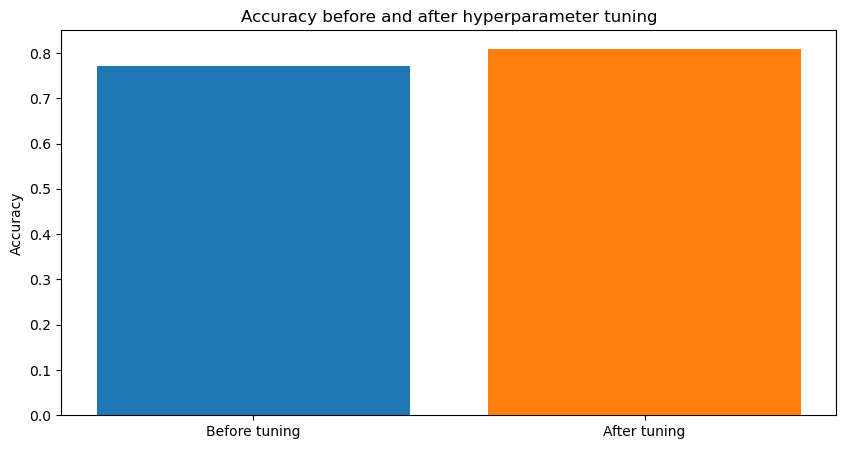

In [6]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 5))

acc_before_tuning = accuracy_score(y_test, y_pred)

# Before tuning
plt.bar('Before tuning', acc_before_tuning)

# After tuning
plt.bar('After tuning', .81)

plt.ylabel('Accuracy')
plt.title('Accuracy before and after hyperparameter tuning')

plt.show()

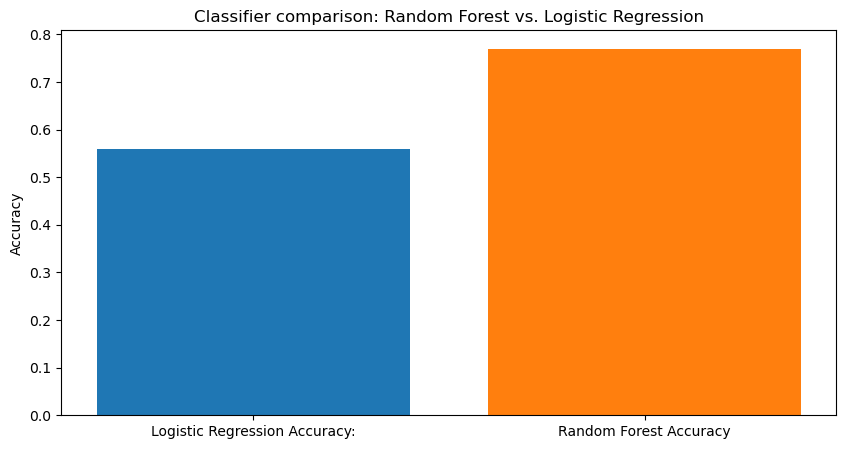

In [7]:
# Plotting
plt.figure(figsize=(10, 5))

acc_before_tuning = accuracy_score(y_test, y_pred)

# Before tuning
plt.bar('Logistic Regression Accuracy:', .56)

# After tuning
plt.bar('Random Forest Accuracy', .77)

plt.ylabel('Accuracy')
plt.title('Classifier comparison: Random Forest vs. Logistic Regression')

plt.show()